<h2> DECESSI REGISTRATI DALLA PROTEZIONE CIVILE </h2> 

<p> Il DataFrame contiene i decessi COVID-19 dal <b>22 marzo 2020 </b> al <b>22 maggio 2020</b> per le province di: <b>Piacenza</b>, <b>Ravenna</b>, <b>Gorizia</b>, <b>Trieste</b>, <b>Pordenone</b>, <b>Sondrio</b>, <b>Ragusa</b> e <b>Rovigo</b>.
    </p>

In [3]:
import pandas as pd 
decessi_covid_pc = pd.read_csv('../csv/decessi_covid19_8province.csv')
decessi_covid_pc.head()

,data,decessi
0,2020-03-22,44.0
1,2020-03-23,33.0
2,2020-03-24,46.0
3,2020-03-25,32.0
4,2020-03-26,39.0


<h3>Creazione serie storica dei decessi COVID-19 Protezione Civile </h3>

In [4]:
decessi_covid_pc['data'] = pd.to_datetime(decessi_covid_pc['data'])
decessi_covid_pc = decessi_covid_pc.set_index('data')
decessi_covid_pc.head()

,decessi
data,
2020-03-22,44.0
2020-03-23,33.0
2020-03-24,46.0
2020-03-25,32.0
2020-03-26,39.0


In [5]:
ts_decessi_covid_pc = decessi_covid_pc['decessi']
ts_decessi_covid_pc

data
2020-03-22    44.0
2020-03-23    33.0
2020-03-24    46.0
2020-03-25    32.0
2020-03-26    39.0
              ... 
2020-05-18     5.0
2020-05-19     1.0
2020-05-20     5.0
2020-05-21     3.0
2020-05-22     7.0
Name: decessi, Length: 62, dtype: float64

<p><b>ts_decessi_covid_pc</b> è la serie storica che contiene i decessi causa COVID-19 delle province prese in esame nel periodo tra il <b>22 marzo 2020 </b> e il <b>22 maggio 2020</b>.
    </p>

<h2>DECESSI REGISTRATI DALL'ISTAT</h2>

<p> Il DataFrame contiene i decessi totali dall'anno <b>2015</b> al <b>30 giugno 2020</b> per le province di: <b>Piacenza</b>, <b>Ravenna</b>, <b>Gorizia</b>, <b>Trieste</b>, <b>Pordenone</b>, <b>Sondrio</b>, <b>Ragusa</b> e <b>Rovigo</b>.
    </p>

In [6]:
df = pd.read_csv('../csv/serie_storica_8province.csv')
df.head()

,DATA,TOTALE
0,2015-01-01,109
1,2015-01-02,104
2,2015-01-03,85
3,2015-01-04,80
4,2015-01-05,100


In [7]:
df['DATA'] = pd.to_datetime(df['DATA'])

In [8]:
#PERIODO COVID: dal 22 marzo al 23 maggio
df_covid_period = df[df['DATA'] > '2020-03-21']  
df_covid_period = df_covid_period[df_covid_period['DATA'] < '2020-05-23']
df_covid_period.head()

,DATA,TOTALE
1907,2020-03-22,126
1908,2020-03-23,130
1909,2020-03-24,121
1910,2020-03-25,128
1911,2020-03-26,139


<h3>Creazione serie storica dei decessi totali ISTAT </h3>

In [9]:
df_covid_period = df_covid_period.set_index('DATA')
df_covid_period.head()

,TOTALE
DATA,
2020-03-22,126
2020-03-23,130
2020-03-24,121
2020-03-25,128
2020-03-26,139


In [10]:
ts_covid_period = df_covid_period.TOTALE
ts_covid_period

DATA
2020-03-22    126
2020-03-23    130
2020-03-24    121
2020-03-25    128
2020-03-26    139
             ... 
2020-05-18     64
2020-05-19     62
2020-05-20     60
2020-05-21     54
2020-05-22     76
Name: TOTALE, Length: 62, dtype: int64

<p><b>ts_covid_period</b> è la serie storica che contiene i decessi totali delle province prese in esame nel periodo tra il <b>22 marzo 2020 </b> e il <b>22 maggio 2020</b>.
    </p>

<h2> DECESSI MODELLO ARIMA </h2>

<p> Il DataFrame contiene i decessi secondo il modello predittivo <b>ARIMA</b> dall'anno <b>2015</b> al <b>30 giugno 2020</b> per le province di: <b>Piacenza</b>, <b>Ravenna</b>, <b>Gorizia</b>, <b>Trieste</b>, <b>Pordenone</b>, <b>Sondrio</b>, <b>Ragusa</b> e <b>Rovigo</b>.</p>

In [11]:
predictions = pd.read_csv('../csv/predictions_daily_ARIMA_8province.csv')

predictions.dropna(inplace=True)
predictions.head()

,Unnamed: 0,0
0,2015-01-01,68.475947
1,2015-01-02,90.008134
2,2015-01-03,94.252608
3,2015-01-04,91.574663
4,2015-01-05,88.739721


In [12]:
predictions.rename(columns={'Unnamed: 0': 'Data', '0':'Totale'}, inplace=True)
predictions.head()

,Data,Totale
0,2015-01-01,68.475947
1,2015-01-02,90.008134
2,2015-01-03,94.252608
3,2015-01-04,91.574663
4,2015-01-05,88.739721


In [13]:
predictions['Data'] = pd.to_datetime(predictions['Data'])
predictions.Totale = pd.to_numeric(predictions.Totale)

In [14]:
#PERIODO COVID: dal 22 marzo 2020 al 22 maggio 2020
predictions_covid_period = predictions[predictions['Data'] > '2020-03-21']
predictions_covid_period = predictions_covid_period[predictions_covid_period['Data'] < '2020-05-23']
predictions_covid_period.head()

,Data,Totale
1907,2020-03-22,73.534320
1908,2020-03-23,73.672308
1909,2020-03-24,73.363901
1910,2020-03-25,73.495343
1911,2020-03-26,73.189247


<h3>Creazione serie storica dei decessi modello ARIMA </h3>

In [15]:
predictions_covid_period = predictions_covid_period.set_index('Data')
predictions_covid_period.head()

,Totale
Data,
2020-03-22,73.534320
2020-03-23,73.672308
2020-03-24,73.363901
2020-03-25,73.495343
2020-03-26,73.189247


In [16]:
ts_predictions_covid_period = predictions_covid_period.Totale
ts_predictions_covid_period

Data
2020-03-22    73.534320
2020-03-23    73.672308
2020-03-24    73.363901
2020-03-25    73.495343
2020-03-26    73.189247
                ...    
2020-05-18    68.101049
2020-05-19    67.880845
2020-05-20    67.913717
2020-05-21    67.697548
2020-05-22    67.729525
Name: Totale, Length: 62, dtype: float64

<p><b>ts_predictions_covid_period</b> è la serie storica che contiene i decessi secondo il modello predittivo <b>ARIMA</b> delle province prese in esame nel periodo tra il <b>22 marzo 2020 </b> e il <b>22 maggio 2020</b>.

<h1> CONFRONTO DELLE SERIE STORICHE </h1>

<p>Le <b>serie storiche</b> comprendono i dati che si riferiscono alle province di: <b>Piacenza</b>, <b>Ravenna</b>, <b>Gorizia</b>, <b>Trieste</b>, <b>Pordenone</b>, <b>Sondrio</b>, <b>Ragusa</b> e <b>Rovigo</b>
    <br />
    Il <b>periodo di riferimento</b> è dal <b>22 marzo 2020</b> al <b>22 maggio 2020</b>. 
    </p>
    

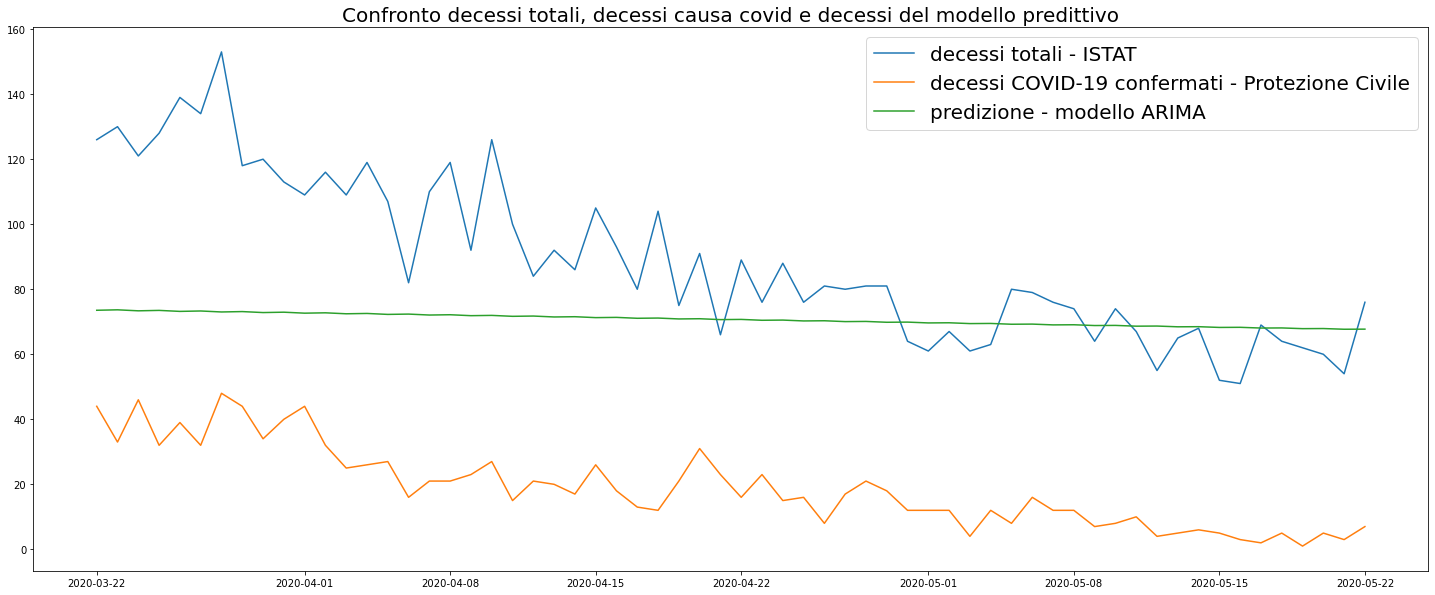

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
plt.title('Confronto decessi totali, decessi causa covid e decessi del modello predittivo', size=20)
plt.plot(ts_covid_period, label='decessi totali - ISTAT')
plt.plot(ts_decessi_covid_pc, label='decessi COVID-19 confermati - Protezione Civile')
plt.plot(ts_predictions_covid_period, label='predizione - modello ARIMA')

plt.legend(prop={'size': 20})
plt.show()

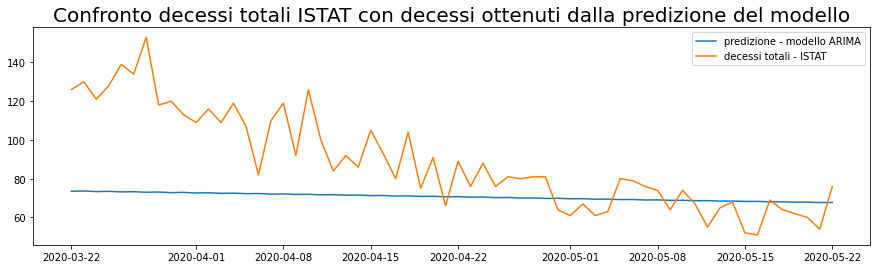

In [21]:
plt.figure(figsize=(15,4))
plt.title('Confronto decessi totali ISTAT con decessi ottenuti dalla predizione del modello', size=20)
plt.plot(ts_predictions_covid_period, label='predizione - modello ARIMA')
plt.plot(ts_covid_period, label='decessi totali - ISTAT')
plt.legend()
plt.show()

<p> <b>n:</b> decessi covid secondo il modello
    <br />
    <b>ts_covid_period:</b> decessi totali registrati dell'ISAT da febbraio a giugno
    <br />
    <b>ts_predictions_covid_period:</b> decessi previsti dal modello da febbraio a giugno 
</p>

<h1>Calcolo dei decessi COVID-19 secondo il modello predittivo

Differenza tra i decessi totali rilasciati dall'ISTAT e i decessi secondo la previsione del modello ARIMA.

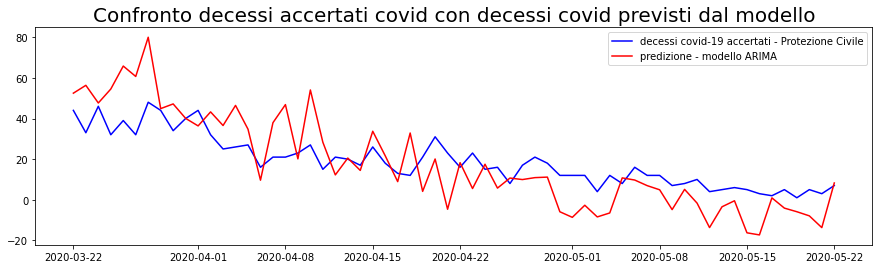

In [22]:
n = ts_covid_period - ts_predictions_covid_period 

plt.figure(figsize=(15,4))
plt.title('Confronto decessi accertati covid con decessi covid previsti dal modello', size=20)
plt.plot(ts_decessi_covid_pc, color='blue', label='decessi covid-19 accertati - Protezione Civile')
plt.plot(n, color='red', label='predizione - modello ARIMA')
plt.legend()
plt.show()

<h3>Numero totale dei decessi accertati COVID-19 dal 22 marzo al 22 maggio per le province di <b>Piacenza</b>, <b>Ravenna</b>, <b>Gorizia</b>, <b>Trieste</b>, <b>Pordenone</b>, <b>Sondrio</b>, <b>Ragusa</b> e <b>Rovigo</b>.

In [27]:
m = ts_decessi_covid_pc.sum()
print(int(m))

1176


<h3>Numero totale dei decessi COVID-19 previsti dal modello ARIMA dal 22 marzo al 22 maggio 2020 per le province di Piacenza, Ravenna, Gorizia, Trieste, Pordenone, Sondrio, Ragusa e Rovigo

In [28]:
total = n.sum()
print(int(total))

1122


<h3>Stima del numero dei decessi COVID-19 non registrati secondo il modello predittivo ARIMA dal 22 marzo al 22 maggio 2020 per le province di Piacenza, Ravenna, Gorizia, Trieste, Pordenone, Sondrio, Ragusa e Rovigo

In [26]:
x = ts_covid_period - ts_predictions_covid_period - ts_decessi_covid_pc
x = x.sum()
print(int(x))

-53
